In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.models import Model,Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
import pandas as pd

In [ ]:
test = pd.read_csv('/content/mitbih_test.csv',header=None)
train = pd.read_csv('/content/mitbih_train.csv',header=None, low_memory=False)

In [ ]:
print(train.columns)


Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187],
      dtype='int64', length=188)


In [ ]:
print(test.info())
print("********************")
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Columns: 188 entries, 0 to 187
dtypes: float64(187), object(1)
memory usage: 3.6+ MB
None
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 984.2 KB
None


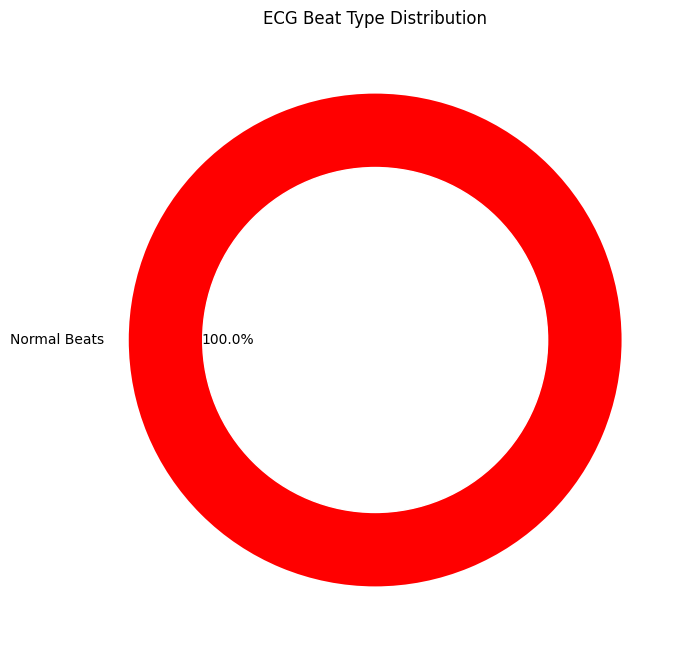

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# --- FIX: Reload the 'train' DataFrame ---
# This ensures we are using the full, unfiltered dataset.
try:
    train = pd.read_csv('mitbih_train.csv', header=None, low_memory=False)
except FileNotFoundError:
    print("Error: 'mitbih_train.csv' not found. Please ensure the file is in the correct directory.")
    # As a fallback, try the test file
    try:
        train = pd.read_csv('mitbih_test.csv', header=None, low_memory=False)
        print("Using 'mitbih_test.csv' as a fallback.")
    except FileNotFoundError:
        print("Error: Neither 'mitbih_train.csv' nor 'mitbih_test.csv' could be found.")
        train = pd.DataFrame({187: [0.0]}) # Dummy data to prevent crash

# Define the mapping for all 5 classes by their numerical index
LABEL_MAP = {
    0.0: 'Normal Beats',
    1.0: 'Supraventricular ectopic beats',
    2.0: 'Ventricular ectopic beats',
    3.0: 'Fusion Beats',
    4.0: 'Unknown Beats'
}

# Count heartbeat types in column 187
counts = train[187].value_counts()

# Sort the counts by the index (0.0, 1.0, 2.0, etc.)
counts = counts.sort_index()

# Dynamically create the labels list from the sorted counts
pie_labels = [LABEL_MAP.get(beat_type, f'Unknown Class {beat_type}') for beat_type in counts.index]

# Define colors that match the sorted index 0-4
colors_list = ['red','cyan','blue','magenta','orange']

# Donut (pie) chart
plt.figure(figsize=(8,8))
my_circle = plt.Circle((0,0), 0.7, color='white')

# Pass the sorted values and the dynamically generated labels
plt.pie(counts,
        labels=pie_labels,
        autopct='%0.1f%%',  # Use 1 decimal place
        colors=colors_list[:len(counts)])

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title("ECG Beat Type Distribution")
plt.savefig("ecg_beat_distribution_corrected.png")
plt.show()

In [ ]:
from keras.utils import to_categorical
trainX = train.loc[:,train.columns!=187]
trainY = train.loc[:,train.columns==187]
trainY = to_categorical(trainY)
testX = test.loc[:,test.columns!=187]
testY = test.loc[:,test.columns==187]
testY = to_categorical(testY)

/usr/local/lib/python3.12/dist-packages/pandas/core/generic.py:2153: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


IndexError: index -9223372036854775808 is out of bounds for axis 1 with size 1

In [ ]:
print (testX.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 187 entries, 0 to 186
dtypes: float64(187)
memory usage: 31.2 MB
None


In [ ]:
model = Sequential()
model.add(Dense(187,activation='relu' , input_shape=(187,)))
model.add(Dense(100 , activation='relu'))
model.add(Dense(5,activation='softmax'))
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
his = model.fit(trainX , trainY ,
                batch_size=128,
                validation_data=(testX , testY) ,
                epochs=100 , verbose=True)
print('evaloution: ' )
loss , acc = model.evaluate(testX , testY)
print('loss:' , loss)
print('accuracy: ' , acc)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
685/685 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8967 - loss: 0.4045 - val_accuracy: 0.9508 - val_loss: 0.1777
Epoch 2/100
685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9572 - loss: 0.1562 - val_accuracy: 0.9560 - val_loss: 0.1512
Epoch 3/100
685/685 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9631 - loss: 0.1306 - val_accuracy: 0.9653 - val_loss: 0.1235
Epoch 4/100
685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9696 - loss: 0.1063 - val_accuracy: 0.9662 - val_loss: 0.1254
Epoch 5/100
685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9718 - loss: 0.0990 - val_accuracy: 0.9680 - val_loss: 0.1175
Epoch 6/100
685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9724 - loss: 0.0954 - val_accuracy: 0.9730 - val_loss: 0.0967
Epoch 7/100
685/685 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9744 - loss: 0.0869 - val_accuracy: 0.9732 - val_loss: 0.0993
Epoch 8/100
685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9761 - loss: 0.0846 - val_accu

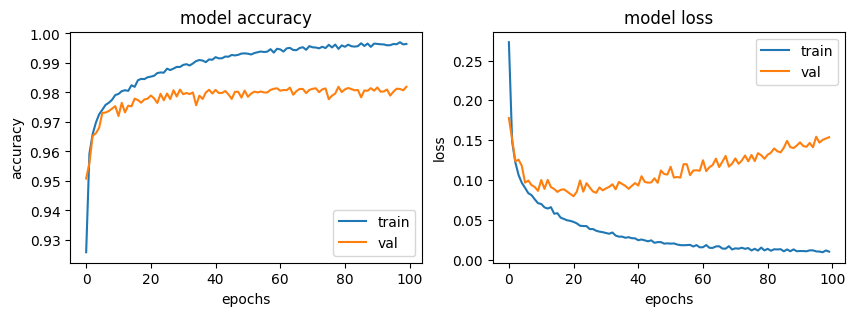

In [ ]:
fig , ax= plt.subplots(1,2,figsize=(10,3))
for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(his.history[met])
    ax[i].plot(his.history['val_' + met])
    ax[i].set_title('model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train' , 'val'])
plt.show()

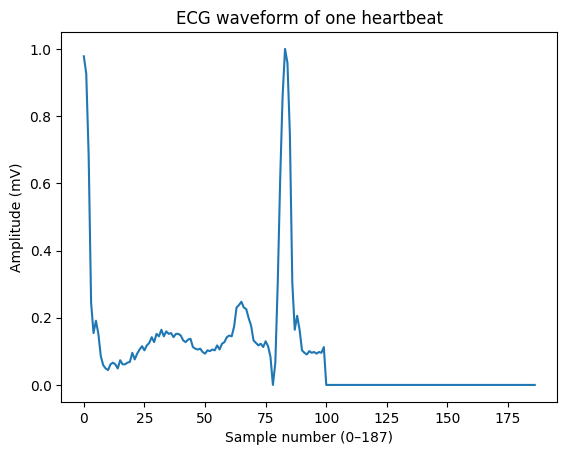

In [ ]:
row = train.iloc[0, 0:187]
plt.plot(row)
plt.title("ECG waveform of one heartbeat")
plt.xlabel("Sample number (0–187)")
plt.ylabel("Amplitude (mV)")
plt.show()


In [ ]:
# --- Code to Save and Download the Model ---

from google.colab import files
import os

# 1. Define the filename for the saved model
# We use the recommended Keras format (.h5) or the newer SavedModel format.
MODEL_FILENAME = 'ecg_classification_model.h5'

# 2. Save the entire model (architecture, weights, optimizer state)
# This creates the file in the Colab virtual machine's disk
model.save(MODEL_FILENAME)
print(f"✅ Model successfully saved to Colab disk as: {MODEL_FILENAME}")

# 3. Download the saved file to your local computer
# This will prompt a download dialog in your web browser
try:
    files.download(MODEL_FILENAME)
    print(f"⬇️ {MODEL_FILENAME} download initiated. Check your browser's downloads.")
except Exception as e:
    print(f"Could not initiate download (this sometimes happens in some environments): {e}")
    print("Look for the file in the 'Files' tab (folder icon on the left) and download it manually.")

# Optional: You can check the file size in Colab before downloading
if os.path.exists(MODEL_FILENAME):
    size_bytes = os.path.getsize(MODEL_FILENAME)
    size_mb = size_bytes / (1024 * 1024)
    print(f"File size: {size_mb:.2f} MB")

✅ Model successfully saved to Colab disk as: ecg_classification_model.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ ecg_classification_model.h5 download initiated. Check your browser's downloads.
File size: 0.65 MB


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model

# 1. Define the filename used when saving the model
MODEL_FILENAME = 'ecg_classification_model.h5'

# 2. Load the trained model from the Colab disk
try:
    # Ensure you load the model after the model.save() cell has run
    loaded_model = load_model(MODEL_FILENAME)
    print("✅ Model loaded successfully!")
except Exception as e:
    print(f"Error loading model. Make sure {MODEL_FILENAME} is in your current directory. Error: {e}")
    # If the file is not found, you must re-upload it or re-run the save step.
    # EXIT here if the model fails to load.
    # return

# 3. Load the 'mitbih_test.csv' file you provided
# Assuming you have the test data loaded/re-uploaded in the Colab environment
test_df = pd.read_csv('/content/mitbih_test.csv', header=None, low_memory=False)

# 4. Prepare a single beat for input
# The model requires 187 features (columns 0 to 186)
# We will take the *first* row (index 0) of the test data as an example input.
input_beat_data = test_df.iloc[0, 0:187].values

# Keras models expect a batch of data, so we need to reshape the single beat
# from (187,) to (1, 187)
input_for_model = input_beat_data.reshape(101, 187)

# 5. Make the prediction
# The output is a probability array for the 5 classes (0, 1, 2, 3, 4)
probabilities = loaded_model.predict(input_for_model)

# 6. Interpret the results
# The predicted class is the index with the highest probability
predicted_class = np.argmax(probabilities)

# Get the true label for comparison (from column 187)
true_class = int(test_df.iloc[0, 187])

# Map the class numbers to the beat names for clear output
class_names = {
    0: 'Normal Beats (N)',
    1: 'Supraventricular ectopic beats (S)',
    2: 'Ventricular ectopic beats (V)',
    3: 'Fusion Beats (F)',
    4: 'Unknown Beats (Q)'
}

print("\n--- Prediction Results for the First Test Beat ---")
print(f"Input Shape: {input_for_model.shape}")
print(f"True Label (Column 187): {true_class} ({class_names.get(true_class, 'Unknown')})")
print(f"Model Output Probabilities: {probabilities[0]}")
print(f"Predicted Class Index: {predicted_class}")
print(f"Predicted Beat Type: {class_names.get(predicted_class, 'Unknown')}")

# Check if the model was correct for this single sample
if predicted_class == true_class:
    print("\nResult: ✅ The model predicted the correct beat type for this sample.")
else:
    print("\nResult: ❌ The model predicted an incorrect beat type for this sample.")

✅ Model loaded successfully!


ValueError: cannot reshape array of size 187 into shape (101,187)

In [ ]:

import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model

# 1. --- Configuration ---
MODEL_FILENAME = 'ecg_classification_model.h5'

# Mapping of the model's output index (0-4) to the clinical beat types
CLASS_NAMES = {
    0: 'Normal Beat (N)',
    1: 'Supraventricular ectopic beat (S)',
    2: 'Ventricular ectopic beat (V)',
    3: 'Fusion Beat (F)',
    4: 'Unknown Beat (Q)'
}

# 2. --- Load the Model ---
try:
    loaded_model = load_model(MODEL_FILENAME)
    print("✅ Model loaded successfully!")
except Exception as e:
    print(f"Error loading model. Make sure {MODEL_FILENAME} is in your current directory. Error: {e}")
    # Exit if the model cannot be loaded
    exit()

# 3. --- Define the Prediction Function ---
def predict_beat_type(beat_readings):
    """
    Takes 187 ECG reading values and returns the predicted beat type.

    :param beat_readings: A list or NumPy array of 187 floating-point values (0 to 186).
    :return: A dictionary containing the predicted class index and beat name.
    """
    # 1. Convert input to a NumPy array (if it isn't already)
    input_array = np.array(beat_readings, dtype=np.float32)

    # 2. Validation Check: Ensure the input has 187 features
    if input_array.shape != (187,):
        raise ValueError(f"Input must have 187 readings, but got shape {input_array.shape}")

    # 3. Reshape for the Keras model (batch size of 1)
    input_for_model = input_array.reshape(1, 187)

    # 4. Make the prediction
    # The output is a probability array for the 5 classes
    probabilities = loaded_model.predict(input_for_model, verbose=0)

    # 5. Determine the predicted class (index with max probability)
    predicted_class_index = np.argmax(probabilities)
    predicted_beat_name = CLASS_NAMES.get(predicted_class_index, 'Undefined')

    # 6. Return the result
    return {
        'class_index': predicted_class_index,
        'beat_type': predicted_beat_name,
        'probabilities': probabilities[0]
    }

# 4. --- Example Usage (Using a Sample from the Test File) ---

# To demonstrate, we'll extract a random beat from the test file
# (assuming it's in the same directory)
test_df = pd.read_csv('mitbih_test.csv', header=None, low_memory=False)

# Get the readings for the 50th beat (features 0 to 186)
sample_index = 20157
sample_beat_readings = test_df.iloc[sample_index, 0:187].values
true_label = int(test_df.iloc[sample_index, 187])

print("\n-----------------------------------------------------")
print(f"Prediction for Sample Beat (Index {sample_index} from Test File)")
print(f"True Beat Type: {true_label} ({CLASS_NAMES.get(true_label, 'Unknown')})")
print("-----------------------------------------------------")

prediction_result = predict_beat_type(sample_beat_readings)

print(f"Predicted Class Index: {prediction_result['class_index']}")
print(f"Predicted Beat Type: {prediction_result['beat_type']}")
print(f"Class Probabilities: {prediction_result['probabilities']}")

if prediction_result['class_index'] == true_label:
    print("✅ Prediction matches the true label!")
else:
    print("❌ Prediction does NOT match the true label.")

✅ Model loaded successfully!

-----------------------------------------------------
Prediction for Sample Beat (Index 20157 from Test File)
True Beat Type: 3 (Fusion Beat (F))
-----------------------------------------------------
Predicted Class Index: 3
Predicted Beat Type: Fusion Beat (F)
Class Probabilities: [4.7448129e-06 4.5348335e-14 3.6377892e-01 6.3621634e-01 2.1593400e-15]
✅ Prediction matches the true label!


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

# --- 1. Configuration ---
MODEL_FILENAME = 'ecg_classification_model.h5'

# Mapping of the model's output index (0-4) to the clinical beat types
CLASS_NAMES = {
    0: 'Normal Beat (N)',
    1: 'Supraventricular ectopic beat (S)',
    2: 'Ventricular ectopic beat (V)',
    3: 'Fusion Beat (F)',
    4: 'Unknown Beat (Q)'
}

# --- 2. Load the Model ---
try:
    # Ensure the 'ecg_classification_model.h5' file is in your current directory
    loaded_model = load_model(MODEL_FILENAME)
    print("✅ Model loaded successfully!")
except Exception as e:
    print(f"Error loading model. Please ensure '{MODEL_FILENAME}' is in the correct directory.")
    print(f"Error details: {e}")
    # Exit the script if the model cannot be loaded
    exit()

# --- 3. PLACEHOLDER FOR YOUR REAL-LIFE ECG DATA ---
# IMPORTANT: Replace this list of 187 zeros with your actual 187 normalized ECG readings (floats).

# Example Placeholder: 187 zeros (This will likely predict 'Unknown Beat')
ECG_READING_INPUT = [0.0] * 187

# --- 4. PREDICTION FUNCTION ---
def predict_real_beat(beat_readings):
    """
    Takes 187 ECG reading values and runs the prediction on the loaded model.
    """
    # Convert the list of 187 floats into a NumPy array
    input_array = np.array(beat_readings, dtype=np.float32)

    # Check and reshape: Model expects a batch shape (1, 187)
    if input_array.shape != (187,):
        raise ValueError(f"Input must have 187 readings, but got {input_array.shape[0]} readings.")

    input_for_model = input_array.reshape(1, 187)

    # Get probabilities from the model (the output array has 5 values)
    probabilities = loaded_model.predict(input_for_model, verbose=0)

    # The predicted class is the index with the highest probability
    predicted_class_index = np.argmax(probabilities)
    predicted_beat_name = CLASS_NAMES.get(predicted_class_index, 'Undefined')

    print("\n-----------------------------------------------------")
    print("        ECG BEAT CLASSIFICATION RESULT")
    print("-----------------------------------------------------")
    print(f"Input Features: 187 values")
    print(f"Predicted Class Index: {predicted_class_index}")
    print(f"Predicted Beat Type:   {predicted_beat_name}")
    print(f"Confidence:            {probabilities[0, predicted_class_index]:.4f}")
    print(f"\nFull Probability Array: {probabilities[0]}")
    print("-----------------------------------------------------")

    return predicted_beat_name

# --- 5. Run the Prediction ---
if __name__ == "__main__":
    predict_real_beat(ECG_READING_INPUT)

✅ Model loaded successfully!

-----------------------------------------------------
        ECG BEAT CLASSIFICATION RESULT
-----------------------------------------------------
Input Features: 187 values
Predicted Class Index: 2
Predicted Beat Type:   Ventricular ectopic beat (V)
Confidence:            0.7500

Full Probability Array: [0.06705488 0.0262845  0.75002074 0.0043002  0.15233965]
-----------------------------------------------------


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

# --- 1. Configuration ---
MODEL_FILENAME = 'ecg_classification_model.h5'

# Mapping of the model's output index (0-4) to the clinical beat types
CLASS_NAMES = {
    0: 'Normal Beat (N)',
    1: 'Supraventricular ectopic beat (S)',
    2: 'Ventricular ectopic beat (V)',
    3: 'Fusion Beat (F)',
    4: 'Unknown Beat (Q)'
}

# --- 2. Load the Model ---
try:
    loaded_model = load_model(MODEL_FILENAME)
    print("✅ Model loaded successfully!")
except Exception as e:
    print(f"Error loading model. Please ensure '{MODEL_FILENAME}' is in the current directory.")
    print(f"Error details: {e}")
    exit()

# --- 3. Function to Get User Input ---
def get_user_ecg_input():
    """Prompts the user to manually enter 187 normalized ECG values."""
    print("\n--- ENTER ECG READING VALUES (187 points) ---")
    print("NOTE: Values must be space-separated floating-point numbers.")
    print("Example: 0.98 0.95 0.90 0.85 ... [up to 187 values]")

    # Use input() to get the entire line of data from the user
    user_input_string = input("Enter the 187 normalized ECG readings (separated by spaces): ")

    # Split the string by spaces and convert each part to a float
    try:
        readings = [float(val.strip()) for val in user_input_string.split()]
    except ValueError:
        print("\n❌ ERROR: Please enter valid numeric data (floating point numbers).")
        return None

    if len(readings) != 187:
        print(f"\n❌ ERROR: Expected 187 readings, but received {len(readings)}. Please try again.")
        return None

    return readings

# --- 4. PREDICTION FUNCTION ---
def predict_user_beat():
    """Gets user input and runs the model prediction."""
    beat_readings = None

    # Loop until valid input is received
    while beat_readings is None:
        beat_readings = get_user_ecg_input()

    # Convert the list to a NumPy array and reshape for the model (1 sample, 187 features)
    input_array = np.array(beat_readings, dtype=np.float32)
    input_for_model = input_array.reshape(1, 187)

    # Get probabilities
    probabilities = loaded_model.predict(input_for_model, verbose=0)

    # Determine the predicted class
    predicted_class_index = np.argmax(probabilities)
    predicted_beat_name = CLASS_NAMES.get(predicted_class_index, 'Undefined')

    print("\n-----------------------------------------------------")
    print("        ECG BEAT CLASSIFICATION RESULT")
    print("-----------------------------------------------------")
    print(f"Input Features Count:  {len(beat_readings)}")
    print(f"Predicted Class Index: {predicted_class_index}")
    print(f"Predicted Beat Type:   {predicted_beat_name}")
    print(f"Confidence:            {probabilities[0, predicted_class_index]:.4f}")
    print("-----------------------------------------------------")

# --- 5. Run the Script ---
if __name__ == "__main__":
    predict_user_beat()

✅ Model loaded successfully!

--- ENTER ECG READING VALUES (187 points) ---
NOTE: Values must be space-separated floating-point numbers.
Example: 0.98 0.95 0.90 0.85 ... [up to 187 values]

❌ ERROR: Expected 187 readings, but received 181. Please try again.

--- ENTER ECG READING VALUES (187 points) ---
NOTE: Values must be space-separated floating-point numbers.
Example: 0.98 0.95 0.90 0.85 ... [up to 187 values]
